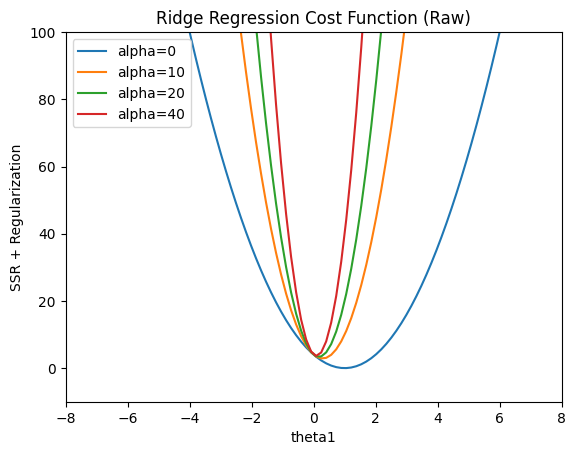

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Cost function with ridge regularization (without division by 2n)
def j_theta_raw(X, y, theta0, theta1, alpha):
    n = len(y)
    sq_error = []
    for i in range(n):
        hypothesis = theta0 + theta1 * X[i]
        xi_error = (hypothesis - y[i])**2
        sq_error.append(xi_error)
    ssr = sum(sq_error)  # Sum of Squared Residuals
    regularization = alpha * (theta1**2)  # Regularization term
    return ssr + regularization

if __name__ == "__main__":
    # Data points
    x = np.array([0, 2])
    y = np.array([0, 2])

    # Generate theta1 values
    theta1_vals = np.linspace(-8, 8, 100)

    # Different alpha values
    alphas = [0, 10, 20, 40]

    # Plotting the raw cost function (SSR + regularization) for different alphas
    for alpha in alphas:
        raw_cost_vals = [j_theta_raw(x, y, 0, theta1, alpha) for theta1 in theta1_vals]
        plt.plot(theta1_vals, raw_cost_vals, label=f'alpha={alpha}')

    plt.xlabel("theta1")
    plt.ylabel("SSR + Regularization")
    plt.title('Ridge Regression Cost Function (Raw)')
    plt.legend()
    plt.axis([-8, 8, -10, 100])  # Adjust axis limits as needed
    plt.show()

Alpha: 0, Mean Squared Error: 16.24137483186783
Alpha: 100, Mean Squared Error: 16.265384753547494
Alpha: 1000, Mean Squared Error: 18.083794946892084
Alpha: 10000, Mean Squared Error: 52.95712387255183


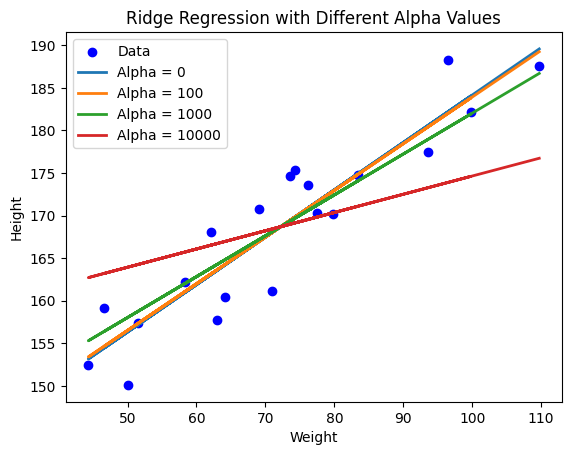

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Load data
data = pd.read_csv('HeightWeight20.csv')

# Prepare the data
X = data[['Weight']]
y = data['Height']

# Define alpha values to test
alphas = [0,100,1000,10000]

# Plot the results
plt.scatter(X, y, color='blue', label='Data')

for alpha in alphas:
    # Create a Ridge regression model with the current alpha value
    model = Ridge(alpha=alpha)
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y, y_pred)
    print(f'Alpha: {alpha}, Mean Squared Error: {mse}')

    # Plot the line for the current alpha
    plt.plot(X, y_pred, label=f'Alpha = {alpha}', linewidth=2)

plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Ridge Regression with Different Alpha Values')
plt.legend()
plt.show()
